In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import geopandas 
from typing import List 
import matplotlib.pyplot as plt 
# from urllib.request import urlopen
# import urllib.request

In [8]:
# Scraped tables do not have state initial columns which plotly needs to make graphs.

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [38]:
"""
    Static function to pull Value of a Dollar table from patriotsoftware which 
    we join and multiply on the salary by state to find dollar adjusted jobs 
"""
def get_ppp_table():
    # ppe url table and response 
    ppp_url = "https://www.patriotsoftware.com/blog/accounting/average-cost-living-by-state/"
    ppp_response = requests.get(ppp_url, timeout=10)
    # print(ppp_response)
    ppp_text: List[pd.DataFrame] = pd.read_html(ppp_response.text, header=0)
    ppp_table: pd.DataFrame = pd.concat(ppp_text)
    # print(ppp_table.head())
    # ppp_table.to_csv("usa_ppe_by_state.csv", index=False)
    # print(type(ppp_table))
    return ppp_table

"""
    Pre-processing function to replace $ value strings with floats so we can perform arithmetic on dataframes 
"""
def replace_dollar_with_float(df):
    
    df = df.set_index('State').apply(lambda x: (x.str.replace('[$,]', '').astype(float)))

    return df 


ppp_table = replace_dollar_with_float(get_ppp_table())

ppp_table

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.


,Annual Mean Wage (All Occupations),Median Monthly Rent,Value of a Dollar
State,,,
Alabama,44930.0,998.0,1.15
Alaska,59290.0,1748.0,0.95
Arizona,50930.0,1356.0,1.04
Arkansas,42690.0,953.0,1.15
California,61290.0,2518.0,0.87
Colorado,57690.0,1927.0,0.97
Connecticut,62350.0,1803.0,0.92
Delaware,54370.0,1435.0,1.00
Florida,47750.0,1590.0,1.00


In [27]:
"""
    Function that takes a job title and returns True if a page
    with average salary info exists on ziprecruiter.

    To-Do: Find more sites with average salary info to try.
"""
def job_title_has_data(job_name: str) -> bool:
    job_name = job_name.replace(" ", "-")
    job_url = "https://ziprecruiter.com/Salaries/What-Is-the-Average-" + job_name + "-Salary-by-State"
    job_response = requests.get(job_url, timeout=10)
    print(job_url)
    
    if "ind=null" in job_response.url or "Moved Permanently" in job_response.url:
        return False
    elif job_response.status_code == 301:
        return False 
    else:
        return True

# query_has_data("Chainsaw Juggler")

https://ziprecruiter.com/Salaries/What-Is-the-Average-Chainsaw-Juggler-Salary-by-State


False

In [31]:
def get_table_for_job_title(job_name: str) -> pd.DataFrame:
    job_name = job_name.replace(" ", "-")
    job_url = "https://ziprecruiter.com/Salaries/What-Is-the-Average-" + job_name + "-Salary-by-State"
    job_response = requests.get(job_url, timeout=10)
    print(job_url)

    job_text: List[pd.DataFrame] = pd.read_html(job_response.text)
    job_table: pd.DataFrame = pd.concat(job_text)

    return job_table

get_table_for_job_title("Data Scientist")

https://ziprecruiter.com/Salaries/What-Is-the-Average-Data-Scientist-Salary-by-State


,State,Annual Salary,Monthly Pay,Weekly Pay,Hourly Wage
0,New York,"$132,826","$11,069","$2,554",$63.86
1,New Hampshire,"$128,704","$10,725","$2,475",$61.88
2,California,"$127,388","$10,616","$2,450",$61.24
3,Vermont,"$121,599","$10,133","$2,338",$58.46
4,Idaho,"$120,011","$10,001","$2,308",$57.70
5,Massachusetts,"$119,234","$9,936","$2,293",$57.32
6,Wyoming,"$118,644","$9,887","$2,282",$57.04
7,Maine,"$117,802","$9,817","$2,265",$56.64
8,Washington,"$116,118","$9,677","$2,233",$55.83
9,Hawaii,"$115,887","$9,657","$2,229",$55.72


In [37]:
"""
    Function ta

"""

def join_and_calc_values()

salary_table = get_table_for_job_title("Data Scientist")
salary_table = replace_dollar_with_float(salary_table)
salary_table

# DS Features
adjusted_salary_table = salary_table.join(ppp_table)
adjusted_salary_table['Adjusted Annual Salary'] = adjusted_salary_table['Annual Salary'] * adjusted_salary_table['Value of a Dollar']
adjusted_salary_table['Monthly Salary Minus Rent'] = adjusted_salary_table['Monthly Pay'] - adjusted_salary_table['Median Monthly Rent']
adjusted_salary_table['DS All Jobs Multiple'] = adjusted_salary_table['Annual Salary'] / adjusted_salary_table['Annual Mean Wage (All Occupations)']
adjusted_salary_table['Median Yearly Rent'] = adjusted_salary_table['Median Monthly Rent'] * 12
adjusted_salary_table['Yearly Salary Minus Rent'] = adjusted_salary_table['Annual Salary'] - adjusted_salary_table['Median Yearly Rent']
adjusted_salary_table['Adjusted Yearly Salary Minus Rent'] = adjusted_salary_table['Yearly Salary Minus Rent'] * adjusted_salary_table['Value of a Dollar']

# All Jobs Features
adjusted_salary_table['Median Salary Minus Rent'] = adjusted_salary_table['Annual Mean Wage (All Occupations)'] - adjusted_salary_table['Median Yearly Rent']
adjusted_salary_table['Adjusted Median Salary Minus Rent'] = adjusted_salary_table['Median Salary Minus Rent'] * adjusted_salary_table['Value of a Dollar']


index = adjusted_salary_table.index.map(us_state_abbrev)
adjusted_salary_table['state initial'] = index 
# salary_table = salary_table.set_index('State').apply(lambda x: (x.str.replace('[$,]', '').astype(float)))

# ppp_table = ppp_table.set_index('State').apply(lambda x: (x.str.replace('[$,]', '').astype(float)))

https://ziprecruiter.com/Salaries/What-Is-the-Average-Data-Scientist-Salary-by-State
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,Annual Salary,Monthly Pay,Weekly Pay,Hourly Wage
State,,,,
New York,132826.0,11069.0,2554.0,63.86
New Hampshire,128704.0,10725.0,2475.0,61.88
California,127388.0,10616.0,2450.0,61.24
Vermont,121599.0,10133.0,2338.0,58.46
Idaho,120011.0,10001.0,2308.0,57.70
Massachusetts,119234.0,9936.0,2293.0,57.32
Wyoming,118644.0,9887.0,2282.0,57.04
Maine,117802.0,9817.0,2265.0,56.64
Washington,116118.0,9677.0,2233.0,55.83


# Feature Engineering #

In [9]:
# DS Features
adjusted_salary_table = salary_table.join(ppp_table)
adjusted_salary_table['Adjusted Annual Salary'] = adjusted_salary_table['Annual Salary'] * adjusted_salary_table['Value of a Dollar']
adjusted_salary_table['Monthly Salary Minus Rent'] = adjusted_salary_table['Monthly Pay'] - adjusted_salary_table['Median Monthly Rent']
adjusted_salary_table['DS All Jobs Multiple'] = adjusted_salary_table['Annual Salary'] / adjusted_salary_table['Annual Mean Wage (All Occupations)']
adjusted_salary_table['Median Yearly Rent'] = adjusted_salary_table['Median Monthly Rent'] * 12
adjusted_salary_table['Yearly Salary Minus Rent'] = adjusted_salary_table['Annual Salary'] - adjusted_salary_table['Median Yearly Rent']
adjusted_salary_table['Adjusted Yearly Salary Minus Rent'] = adjusted_salary_table['Yearly Salary Minus Rent'] * adjusted_salary_table['Value of a Dollar']

# All Jobs Features
adjusted_salary_table['Median Salary Minus Rent'] = adjusted_salary_table['Annual Mean Wage (All Occupations)'] - adjusted_salary_table['Median Yearly Rent']
adjusted_salary_table['Adjusted Median Salary Minus Rent'] = adjusted_salary_table['Median Salary Minus Rent'] * adjusted_salary_table['Value of a Dollar']


index = adjusted_salary_table.index.map(us_state_abbrev)
adjusted_salary_table['state initial'] = index 
adjusted_salary_table.to_csv('salaries.csv')
adjusted_salary_table.head(6)

,Annual Salary,Monthly Pay,Weekly Pay,Hourly Wage,Annual Mean Wage (All Occupations),Median Monthly Rent,Value of a Dollar,Adjusted Annual Salary,Monthly Salary Minus Rent,DS All Jobs Multiple,Median Yearly Rent,Yearly Salary Minus Rent,Adjusted Yearly Salary Minus Rent,Median Salary Minus Rent,Adjusted Median Salary Minus Rent,state initial
State,,,,,,,,,,,,,,,,
New York,132826.0,11069.0,2554.0,63.86,63970.0,2050.0,0.87,115558.62,9019.0,2.076380,24600.0,108226.0,94156.62,39370.0,34251.90,NY
New Hampshire,128704.0,10725.0,2475.0,61.88,53950.0,1748.0,0.94,120981.76,8977.0,2.385616,20976.0,107728.0,101264.32,32974.0,30995.56,NH
California,127388.0,10616.0,2450.0,61.24,61290.0,2518.0,0.87,110827.56,8098.0,2.078447,30216.0,97172.0,84539.64,31074.0,27034.38,CA
Vermont,121599.0,10133.0,2338.0,58.46,51120.0,1599.0,0.98,119167.02,8534.0,2.378697,19188.0,102411.0,100362.78,31932.0,31293.36,VT
Idaho,120011.0,10001.0,2308.0,57.70,44890.0,1238.0,1.08,129611.88,8763.0,2.673446,14856.0,105155.0,113567.40,30034.0,32436.72,ID
Massachusetts,119234.0,9936.0,2293.0,57.32,65680.0,2252.0,0.93,110887.62,7684.0,1.815378,27024.0,92210.0,85755.30,38656.0,35950.08,MA


In [10]:
adjusted_salary_table.head(5)

,Annual Salary,Monthly Pay,Weekly Pay,Hourly Wage,Annual Mean Wage (All Occupations),Median Monthly Rent,Value of a Dollar,Adjusted Annual Salary,Monthly Salary Minus Rent,DS All Jobs Multiple,Median Yearly Rent,Yearly Salary Minus Rent,Adjusted Yearly Salary Minus Rent,Median Salary Minus Rent,Adjusted Median Salary Minus Rent,state initial
State,,,,,,,,,,,,,,,,
New York,132826.0,11069.0,2554.0,63.86,63970.0,2050.0,0.87,115558.62,9019.0,2.076380,24600.0,108226.0,94156.62,39370.0,34251.90,NY
New Hampshire,128704.0,10725.0,2475.0,61.88,53950.0,1748.0,0.94,120981.76,8977.0,2.385616,20976.0,107728.0,101264.32,32974.0,30995.56,NH
California,127388.0,10616.0,2450.0,61.24,61290.0,2518.0,0.87,110827.56,8098.0,2.078447,30216.0,97172.0,84539.64,31074.0,27034.38,CA
Vermont,121599.0,10133.0,2338.0,58.46,51120.0,1599.0,0.98,119167.02,8534.0,2.378697,19188.0,102411.0,100362.78,31932.0,31293.36,VT
Idaho,120011.0,10001.0,2308.0,57.70,44890.0,1238.0,1.08,129611.88,8763.0,2.673446,14856.0,105155.0,113567.40,30034.0,32436.72,ID


# Geopandas USA Shapefile

It turns out geopandas doesn't have USA maps by default as far as I could find by asking around my network and SO so you have to go to a third party site like:
https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html

<AxesSubplot:>

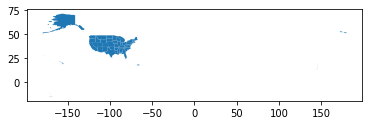

In [11]:
boundary_states = geopandas.read_file('Igismap/United_States-_States_Polygon.shp')
type(boundary_states)
boundary_states.head()
boundary_states.plot()

In [12]:
boundary_states.head()

,id,country,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,note,rpath,iso3166_2,geometry
0,161950,USA,Alabama,Alabama,Alabama,None,administrative,4,Q173,en:Alabama,2018-09-05 11:54:53,None,"161950,148838,0",US-AL,"POLYGON ((-88.47314 31.89395, -88.46888 31.930..."
1,1116270,USA,Alaska,Alaska,Alaska,None,administrative,4,Q797,en:Alaska,2018-09-05 11:54:52,None,"1116270,148838,0",US-AK,"MULTIPOLYGON (((-171.62652 52.49595, -171.6264..."
2,2177187,USA,American Samoa,American Samoa,American Samoa,None,administrative,4,Q16641,en:American Samoa,2018-09-05 11:54:53,None,"2177187,148838,0",US-AS,"MULTIPOLYGON (((-171.05291 -14.32049, -171.052..."
3,162018,USA,Arizona,Arizona,Arizona,None,administrative,4,Q816,en:Arizona,2018-09-05 11:54:50,None,"162018,148838,0",US-AZ,"POLYGON ((-114.81836 32.49908, -114.81714 32.5..."
4,161646,USA,Arkansas,Arkansas,Arkansas,None,administrative,4,Q1612,en:Arkansas,2018-09-05 11:54:49,None,"161646,148838,0",US-AR,"POLYGON ((-94.61786 36.49951, -94.61548 36.499..."


In [13]:
# Final join the salary data with the geopandas geometry table

contiguous = adjusted_salary_table.join(boundary_states.set_index('locname'))

# I don't want to deal with Alaska and Hawaii right now messing visuals up

contiguous = contiguous.drop(labels=["Hawaii", "Alaska"])

# And then you have to cast it back to geodataframe

gdf = geopandas.GeoDataFrame(contiguous)

<AxesSubplot:>

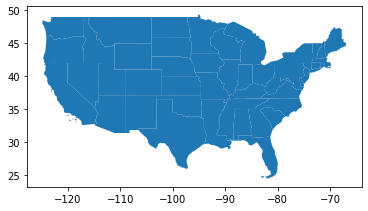

In [14]:
# check to make sure AK and HI are off
gdf.plot()

In [15]:
# gdf.dtypes
# gdf.head()

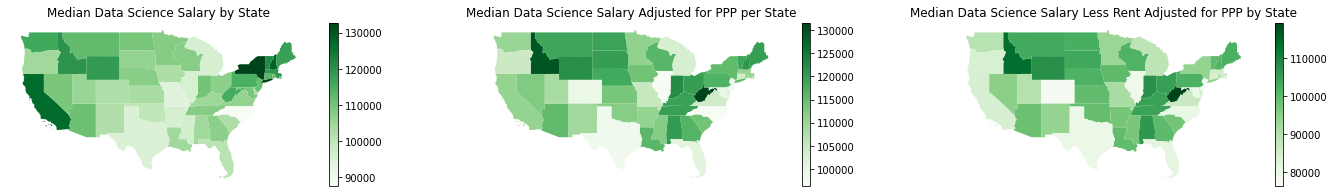

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,3))

var_1 = "Annual Salary"
var_2 = "Adjusted Annual Salary"
var_3 = "Adjusted Yearly Salary Minus Rent"

# create the plots
gdf.plot(column=var_1, ax=ax1, cmap='Greens',legend=True)
gdf.plot(column=var_2, ax=ax2, cmap='Greens', legend=True)
gdf.plot(column=var_3, ax=ax3, cmap='Greens', legend=True)

# create the titles
ax1.set_title('Median Data Science Salary by State')
ax2.set_title('Median Data Science Salary Adjusted for PPP per State')
ax3.set_title('Median Data Science Salary Less Rent Adjusted for PPP by State')

# remove axis
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

fig.savefig("DataScience.png")

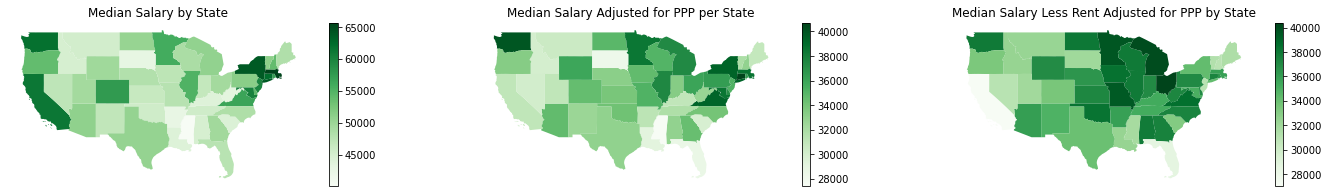

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,3))

var_1 = "Annual Mean Wage (All Occupations)"
var_2 = "Median Salary Minus Rent"
var_3 = "Adjusted Median Salary Minus Rent"

# create the plots
gdf.plot(column=var_1, ax=ax1, cmap='Greens',legend=True)
gdf.plot(column=var_2, ax=ax2, cmap='Greens', legend=True)
gdf.plot(column=var_3, ax=ax3, cmap='Greens', legend=True)

# create the titles
ax1.set_title('Median Salary by State')
ax2.set_title('Median Salary Adjusted for PPP per State')
ax3.set_title('Median Salary Less Rent Adjusted for PPP by State')

# remove axis
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

fig.savefig("All_Salary.png")

In [18]:
job_url

'https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Data-Scientist-Salary-by-State'